# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import traceback
import json
import os
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
import asyncio


### Generate the Cities List by Using the `citipy` Library

In [112]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [113]:
# Set the API base URL https://api.weatherstack.com/current? access_key = YOUR_ACCESS_KEY   & query = New York
# https://api.openweathermap.org/data/2.5/weather?q=London&appid={API key}

url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# fullUrl =url + cities[10] + "&appid=" + weather_api_key

# Loop through all the cities in our list to fetch weather data
cities_test = cities[:15] # test with 10 cities first 
for i, city in enumerate(cities_test):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&units=metric&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        res = requests.get(city_url)
        city_weather = json.loads(res.text)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City {city} not found. Skipping...")
        continue
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | turbat
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | burica
City burica not found. Skipping...
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | maniitsoq
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | barentsburg
City barentsburg not found. Skipping...
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | haines junction
Processing Record 15 of Set 1 | hermanus
-----------------------------
Data Retrieval Complete      
-----------------------------


In [114]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          13
Lat           13
Lng           13
Max Temp      13
Humidity      13
Cloudiness    13
Wind Speed    13
Country       13
Date          13
dtype: int64

In [115]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,turbat,26.0023,63.0440,30.31,28,0,2.52,PK,1679211331
1,iqaluit,63.7506,-68.5145,-27.95,61,0,8.23,CA,1679211332
2,severo-kurilsk,50.6789,156.1250,-4.10,75,79,4.26,RU,1679211333
3,east london,-33.0153,27.9116,22.52,73,40,1.03,ZA,1679211334
4,hobart,-42.8794,147.3294,17.92,52,75,2.57,AU,1679211335


In [116]:
# Export the City_Data into a csv
destPath = os.path.abspath(os.getcwd() + "/output_data/") # assign destination path
if not os.path.exists(destPath): # Check if destination location exists, else create it
    os.makedirs(destPath)

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [117]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,turbat,26.0023,63.0440,30.31,28,0,2.52,PK,1679211331
1,iqaluit,63.7506,-68.5145,-27.95,61,0,8.23,CA,1679211332
2,severo-kurilsk,50.6789,156.1250,-4.10,75,79,4.26,RU,1679211333
3,east london,-33.0153,27.9116,22.52,73,40,1.03,ZA,1679211334
4,hobart,-42.8794,147.3294,17.92,52,75,2.57,AU,1679211335


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

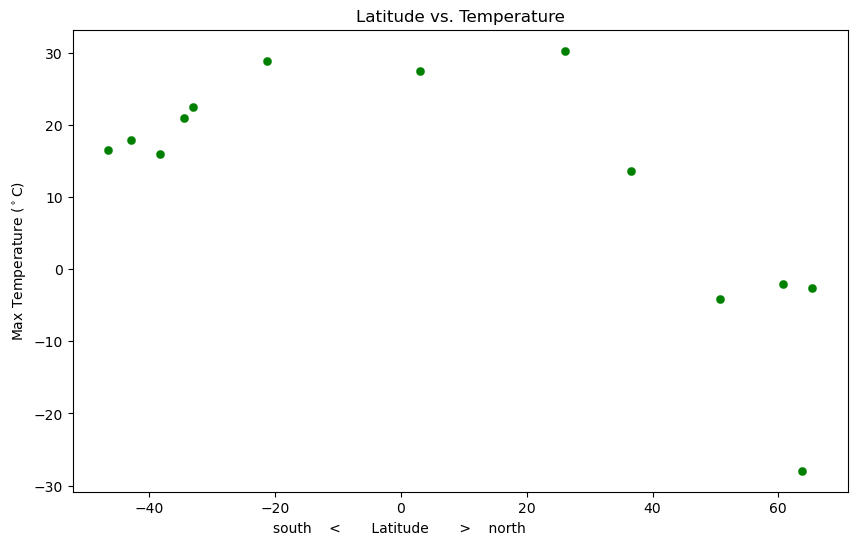

In [172]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],linewidths = .2, color='g', marker ="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('south    <       Latitude       >    north                            ')
plt.ylabel('Max Temperature ($^\circ$C)')
plt.title('Latitude vs. Temperature')
# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

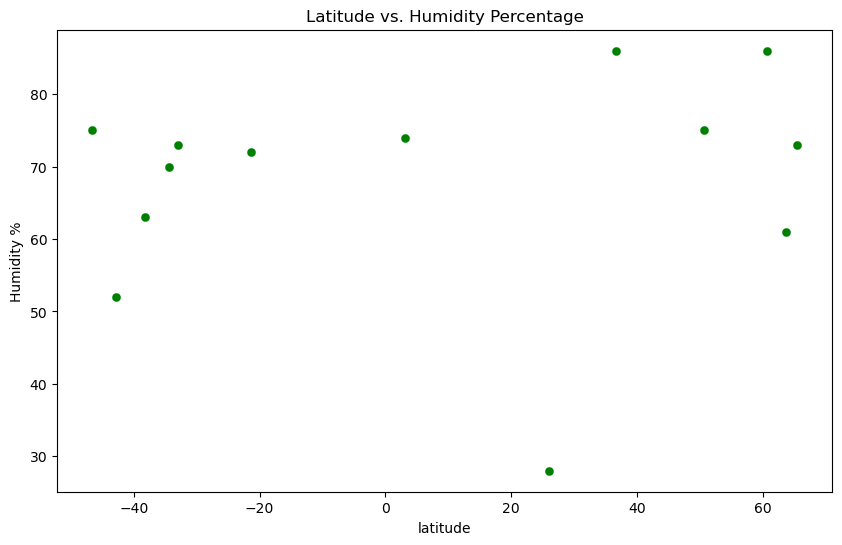

In [173]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],linewidths = .2, color='g', marker ="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('south    <       Latitude       >    north                            ')
plt.ylabel('Humidity %')
plt.title('Latitude vs. Humidity Percentage')
# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [174]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

#### Latitude vs. Wind Speed Plot

In [175]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [176]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [177]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

NameError: name 'northern_hemi_df' is not defined

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE